#Notebook Setup

In [5]:
!python --version

Python 3.12.7


In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
#standard imports
import os

#third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#local imports

In [9]:
sns.set()

Load Data

In [12]:
data = datasets.load_iris()

In [15]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

What problem are we trying to solve?

We are trying to predict the species of the flower using its attributes. Specifically, we are trying to use the sepal length and width and the petal length and width to try and predict if an iris flower is of type _Setosa_, _Versicolor_, or _Virginica_.

This is a multiclass classification problem. 

Create a pandas DataFrame from the data

In [26]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [28]:
df["target"] = data["target"]

In [30]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


  Basic Descriptive statistics

In [33]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Distributions of features and target

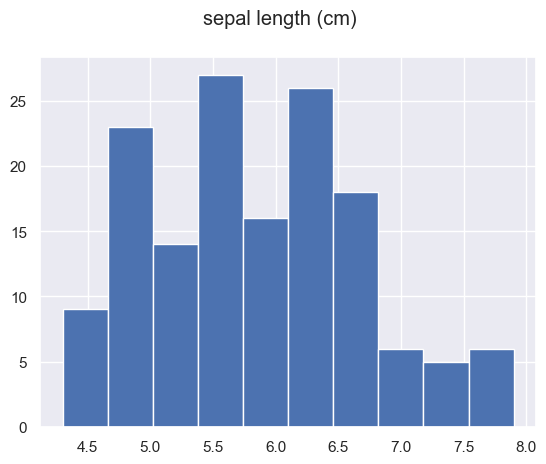

In [36]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

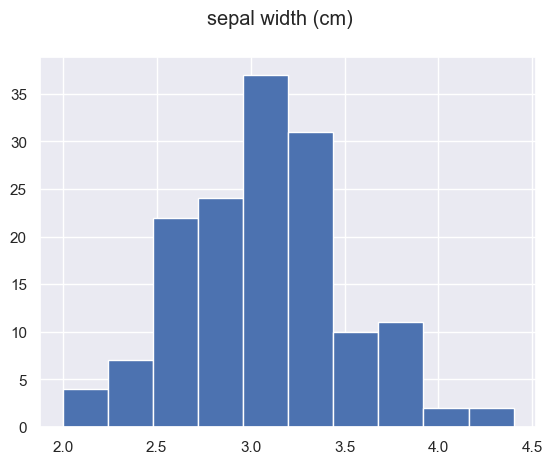

In [38]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

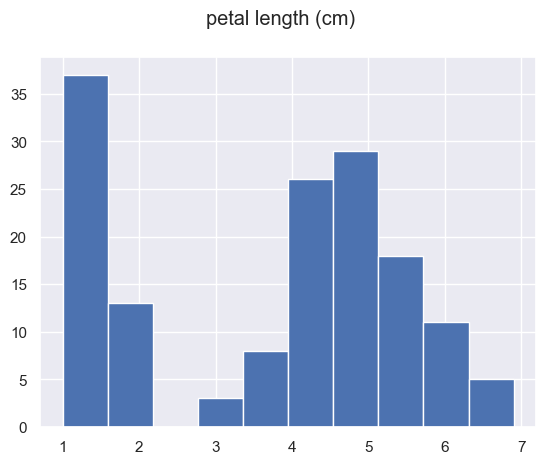

In [40]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

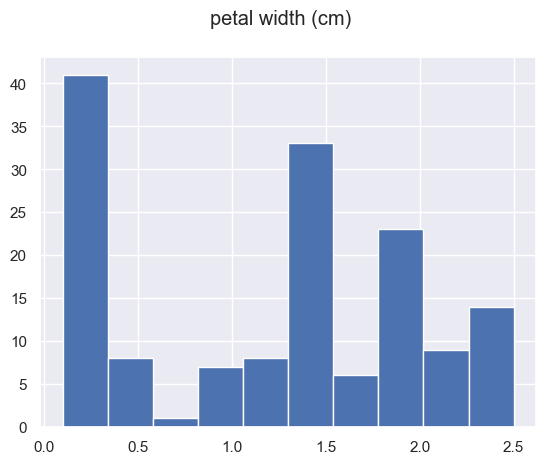

In [42]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

Relationship of the data features with the target

In [45]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
#Create new column with the species name
df["target_name"] = df["target"].map({0 : "setosa", 1 : "versicolor", 2 : "virginica"})

In [49]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


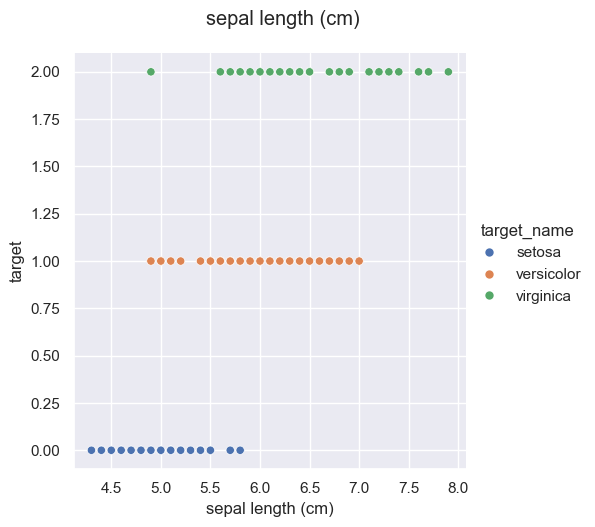

In [51]:
col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)
plt.show()

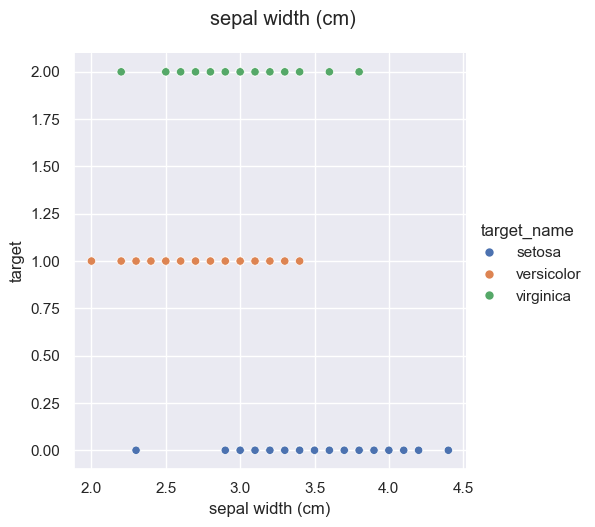

In [52]:
col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)
plt.show()

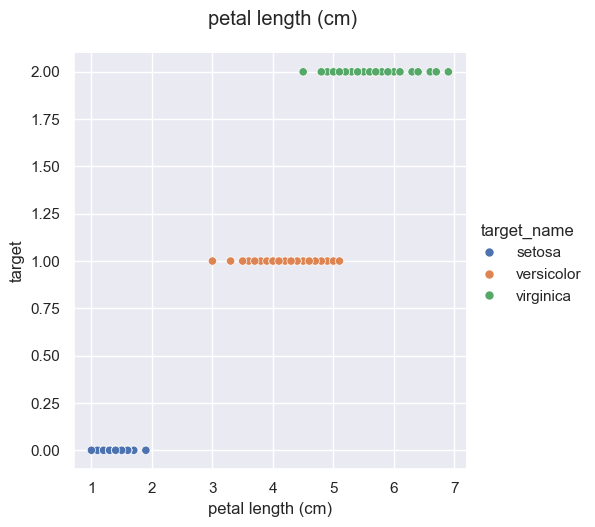

In [54]:
col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)
plt.show()

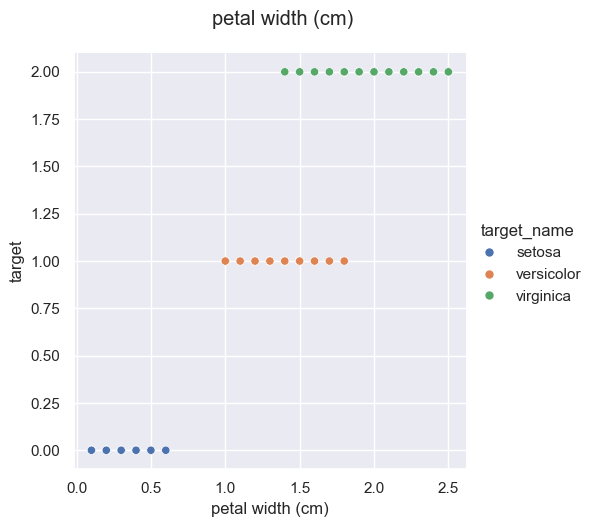

In [55]:
col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_name", data=df)
_ = plt.suptitle(col, y=1.05)
plt.show()

Exploratory Data Analysis (EDA) - Pairplots

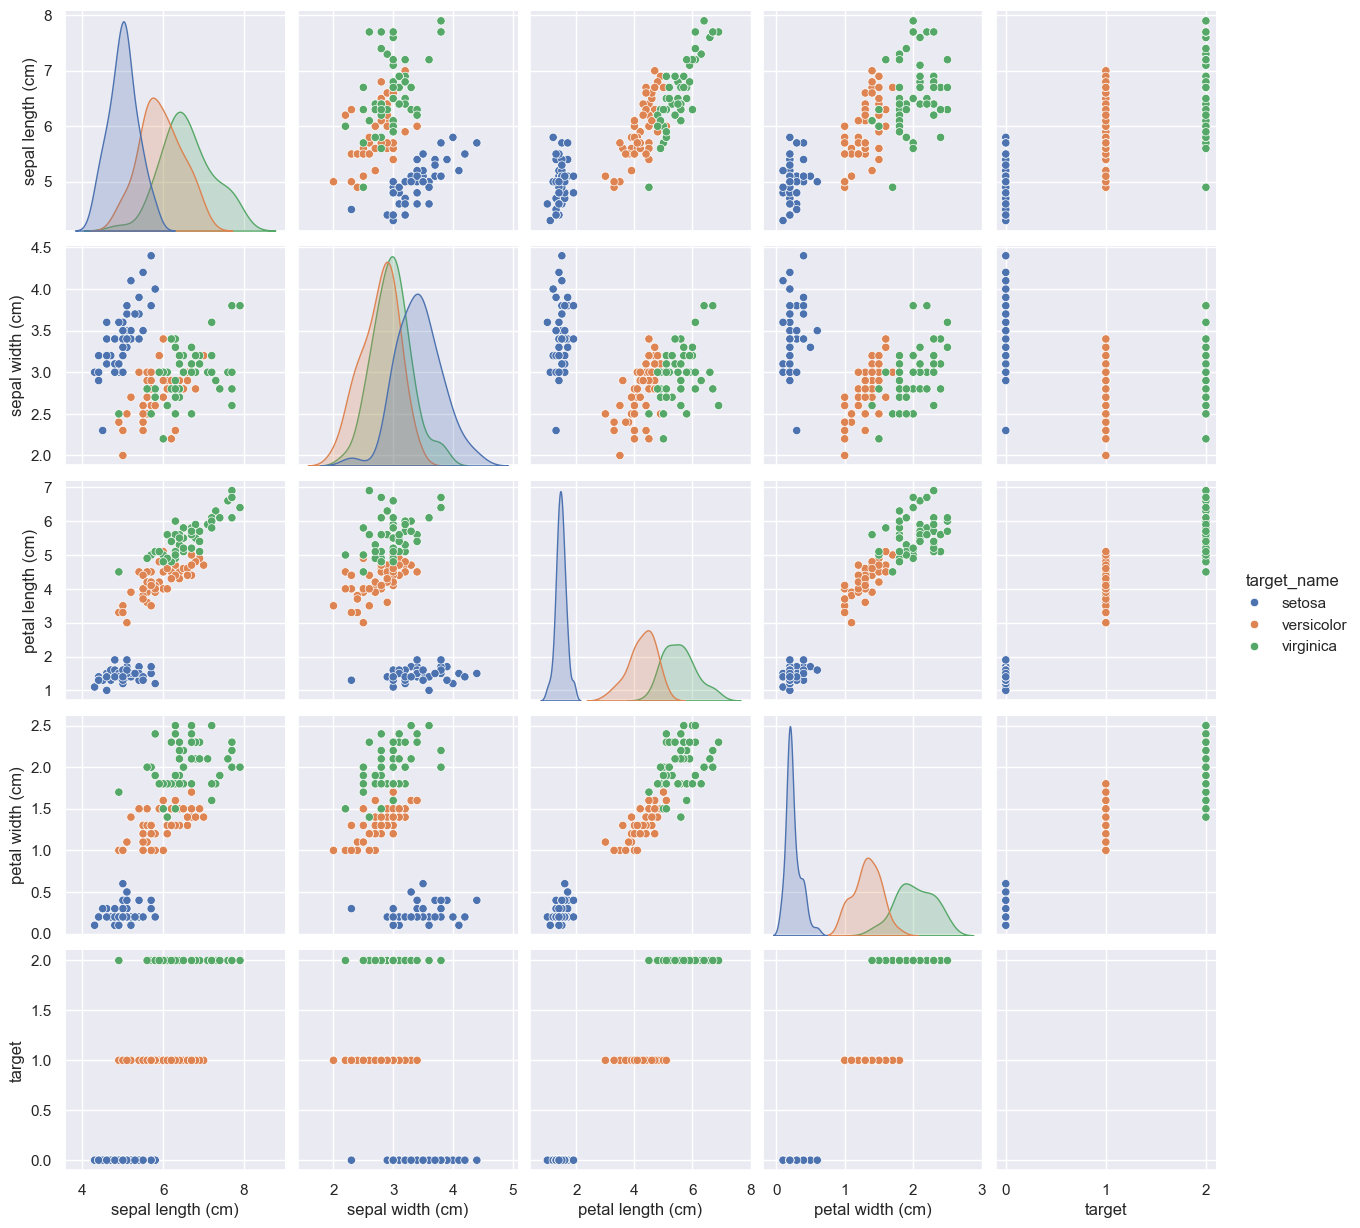

In [58]:
sns.pairplot(df, hue="target_name")
plt.show()

Train test split

You always want to evaluate your final model on a test set that hasn't been used at all in the training process. SO we'll split off a test set here.

_(Note: This might be a little less true if you use cross-validation, but is still considered a best practice.)_

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [64]:
df_train.shape

(112, 6)

In [65]:
df_test.shape

(38, 6)

In [66]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
85,6.0,3.4,4.5,1.6,1,versicolor
77,6.7,3.0,5.0,1.7,1,versicolor
93,5.0,2.3,3.3,1.0,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica


Prepare data for modeling

This involves splitting the data back out into plain NumPy arrays.

In [68]:
x_train = df_train.drop(columns=['target', 'target_name']).values
y_train = df_train['target'].values

Modeling - What is our baseline?

What is the simplest model we can think of?

In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we would expect to have a model accuracy of 0.33 or 33%, since we have 3 different classes that are evenly balanced.

So our model should be at least beat 33% accuracy.

Modeling - Simple manual model

Let's  manually look at out data and decide some cutoff points for classification.

In [71]:
def single_feature_prediction(petal_length):
    """Predicts the Iris species givcen the petal length."""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [72]:
x_train[:, 2]

array([4.5, 5. , 3.3, 4.6, 5.1, 1.4, 1.5, 5.1, 1.6, 4.4, 4.9, 4.2, 4.8,
       1.4, 5.1, 3.7, 4.2, 1.9, 1.6, 1.4, 6.3, 5.2, 1.7, 1. , 4.3, 4.7,
       6.7, 1.4, 1.6, 4. , 6. , 3.9, 4.7, 5. , 1.4, 5.6, 5.1, 4.9, 5.1,
       5.6, 1.5, 1.5, 4. , 1.3, 3.5, 4.8, 1.4, 5.8, 1.3, 5.7, 6.7, 1.4,
       4.9, 4.5, 6.1, 1.3, 3.8, 1.7, 5.9, 1.2, 1.5, 4.4, 1.4, 1.6, 5.4,
       1.5, 1.5, 3.9, 1.3, 5.3, 5.1, 4.9, 5.6, 4.3, 4.5, 5.6, 1.7, 5.8,
       4.9, 4.5, 5.5, 4.6, 1.6, 1.3, 4.7, 6.9, 1.3, 1.9, 5.4, 4.5, 5.3,
       6.1, 1.5, 5.1, 4.1, 5.9, 5.6, 1.5, 4.6, 1.5, 1.4, 4.5, 5.5, 3.3,
       4.5, 1.4, 5.7, 4.8, 5.8, 6.6, 4. , 4.2])

In [74]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [75]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [76]:
print(f"Manual Model Accuracy: {manual_model_accuracy * 100:.2f}%")

Manual Model Accuracy: 95.54%


Modeling - Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

Using a validation set to evaluate our model

In [80]:
model = LogisticRegression(max_iter=200)

In [82]:
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [97]:
model.fit(xt, yt)

LogisticRegression(max_iter=200)

In [99]:
y_pred = model.predict(xv)

In [101]:
np.mean(y_pred == yv)

0.9642857142857143

In [103]:
model.score(xv, yv)

0.9642857142857143

Using cross-validation to evaluate our model.

In [106]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [108]:
model = LogisticRegression(max_iter=200)

In [110]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [112]:
np.mean(accuracies)

0.9731225296442687

Where are we misclassifying points?

In [115]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [117]:
predicted_correctly_mask = y_pred == y_train

In [119]:
not_predicted_correctly = ~predicted_correctly_mask

In [121]:
x_train[not_predicted_correctly]

array([[6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7]])

In [123]:
df_predictions = df_train.copy()

In [125]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [127]:
df_predictions["prediction"] = y_pred

In [129]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0 : "setosa", 1 : "versicolor", 2 : "virginica"})

In [131]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
85,6.0,3.4,4.5,1.6,1,versicolor,True,1,versicolor
77,6.7,3.0,5.0,1.7,1,versicolor,False,2,virginica
93,5.0,2.3,3.3,1.0,1,versicolor,True,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor,True,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica,True,2,virginica


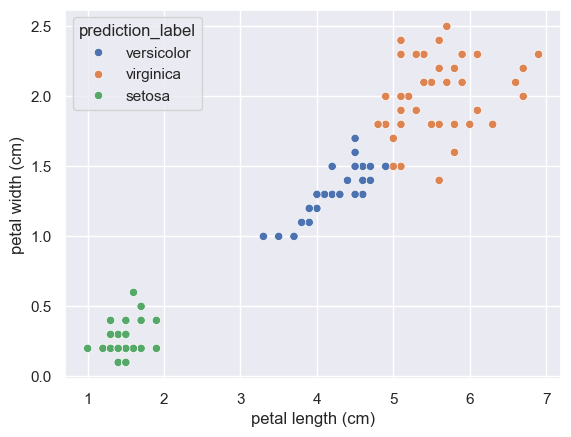

In [133]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediction_label", data=df_predictions)
plt.show()

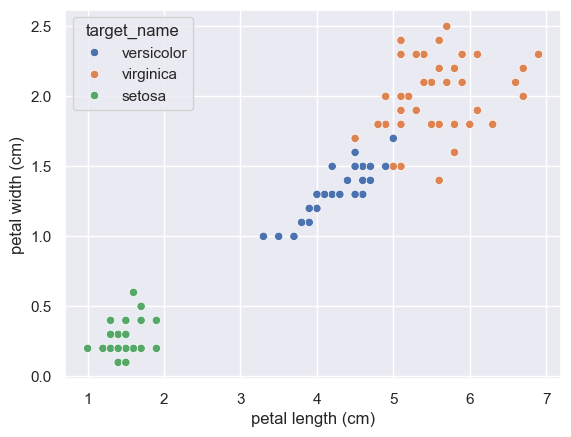

In [134]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_name", data=df_predictions)
plt.show()

In [136]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

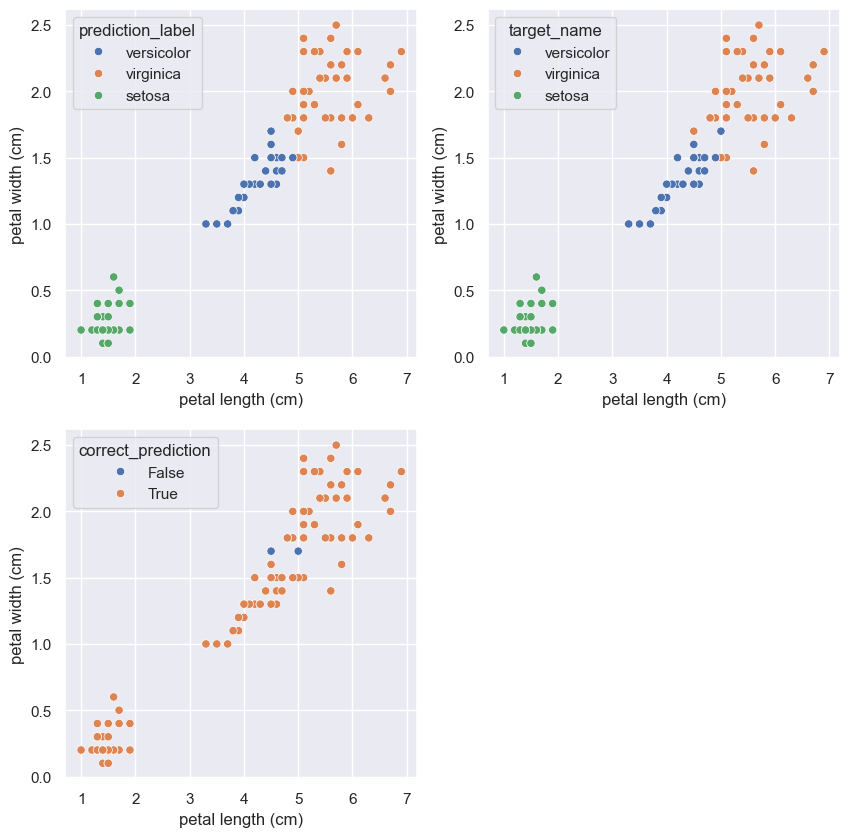

In [139]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

Model Tuning

What is model tuning?

Model tuning is trying to determine the parameters of your model (these are also known as "hyperparameters") that maximizes the model performance.


In [187]:
for reg_param in (1, 1.3, 1.8, 2, 2.3, 2.9, 3, 5, 10, 100):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

1
Accuracy: 97.31%
1.3
Accuracy: 97.31%
1.8
Accuracy: 97.31%
2
Accuracy: 97.31%
2.3
Accuracy: 97.31%
2.9
Accuracy: 98.22%
3
Accuracy: 98.22%
5
Accuracy: 98.18%
10
Accuracy: 98.18%
100
Accuracy: 97.31%


Final Model

In [192]:
model = LogisticRegression(max_iter=200, C=2)

How well does our model do on the test set?

In [197]:
x_test = df_test.drop(columns=['target', 'target_name']).values
y_test = df_test['target'].values

In [199]:
x_test.shape

(38, 4)

In [201]:
y_test

array([0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2])

Train our final model using our full Training Dataset

In [204]:
model.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=200)

In [206]:
y_test_pred = model.predict(x_test)

In [208]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [214]:
print(f"Test Set Accuracy:: {test_set_accuracy * 100:.2f}%")

Test Set Accuracy:: 97.37%


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [218]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0 : "setosa", 1 : "versicolor", 2 : "virginica"})

In [220]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
45,4.8,3.0,1.4,0.3,0,setosa,True,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor,True,1,versicolor
95,5.7,3.0,4.2,1.2,1,versicolor,True,1,versicolor
120,6.9,3.2,5.7,2.3,2,virginica,True,2,virginica
51,6.4,3.2,4.5,1.5,1,versicolor,True,1,versicolor


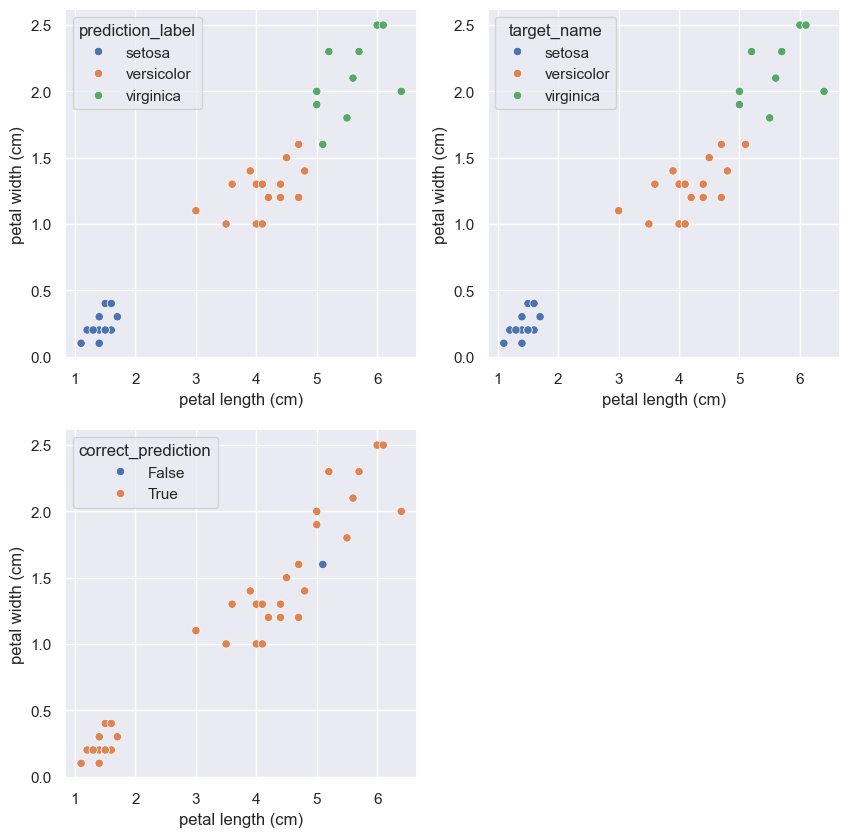

In [222]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature="petal length (cm)", y_axis_feature="petal width (cm)")

In Conclusion...

In conclusion, we achieved an accuracy of 97.37% on the test dataset using a logistic regression model with these model parameters: 

```
to be put
```

Congrats to urself!!